In this exercise, we will generate an instance of the previously described Inception model, provided by the keras application library.
First of all, we will import all the needed libraries, including the keras model handling, the image preprocessing one, the Gradient Descent used to optimize the variables, and several Inception utilities.
Additionally, we will use the OpenCV libraries to adjust tne new input images, and the common Numpy and matplotlib libraries.

In [1]:
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input

import matplotlib.pyplot as plt
import numpy as np
import cv2

Using TensorFlow backend.


Keras makes really simple the loading of a model, you just have to invoque a new instance of the InceptionV3 class, and then we will assign a determined optimizer based on Stocastic Gradient Descent, and the categorical crossentropy, for the loss, which is very well suited for image classification problems.

In [2]:
model=InceptionV3()
model.compile(optimizer=SGD(), loss='categorical_crossentropy')

Now that the model is loaded into memory, it's time to load and adjust the  photo using the cv library, and then we call the preprocess input of the keras application, which will normalize the values

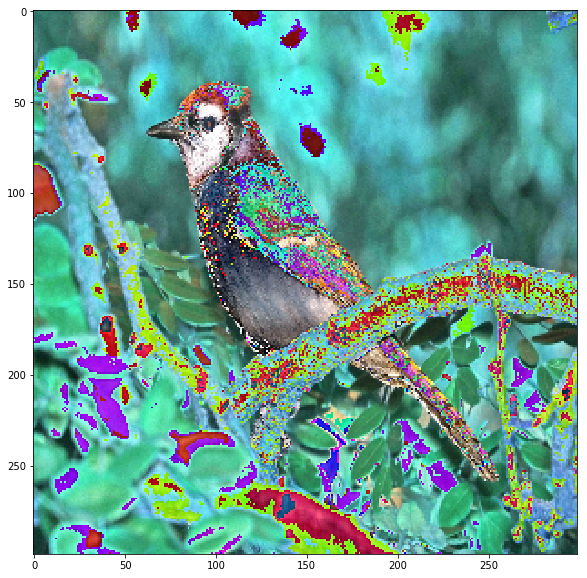

In [3]:
# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('blue_jay.jpg'), (299, 299))
im = np.expand_dims(im, axis=0)
im = im /255.
im = im - 0.5
im =  im * 2
plt.figure (figsize=(10,10))
plt.imshow(im[0], cmap=plt.get_cmap('binary_r'))
plt.savefig("Multilayer convolutional.jpg")
plt.show()

Now we will invoque the predict method of the model, which will show the results of the last layer of the neural nttwork, an array of probabilities for each one of the categories. The decode_predictions method reads a dictionaries with all the categories number as index, and the category name as the value, and so it informs the name of the detected item classification, instead of the number

In [4]:
out = model.predict(im)
print('Predicted:', decode_predictions(out, top=3)[0])
print (np.argmax(out))

40960/35363 [==================================] - 1s 31us/step
Predicted: [('n01530575', 'brambling', 0.18320681), ('n01824575', 'coucal', 0.14039119), ('n01560419', 'bulbul', 0.04707137)]
10
